In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.cluster import KMeans 
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score

# Read data from file

In [9]:
path = r"C:\Users\Admins\Programming\Data Science\HCMUTE_DataScience\Foundation of Data Science Projects\SCMission-2023_Round-3-Data-Đã clean.xlsm"

In [13]:
df = pd.read_excel(path, sheet_name = 'Customer_Master')
df.head(5)

,STT,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
0,1,11000128,Customer 48,11000128,Company 4,Account 3,91363,91240,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
1,2,11000144,Customer 50,11000144,Company 6,Account 4,91418,91295,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne
2,3,11000149,Customer 51,11000149,Company 7,Account 3,91363,91240,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast
3,4,11000159,Customer 52,11000159,Company 8,Account 3,91363,91240,Foodservice,National Distributor,153.122555,-27.617230,Logan,Queensland,Australia,Organization 1,Greater Brisbane
4,5,11000176,Customer 53,11000176,Company 9,Account 4,91418,91295,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne


In [14]:
another_df = pd.read_excel(path, sheet_name = 'Sales_Order')
another_df.head()

,STT,SOCreationDate,OrderNumber,OriginRef,ProductID,CustomerRef,Legit?,DeliveryDate,GoodsIssueDate,RequestedDelivDate,Channel,SalesOrganization,OrderQuantityInKg,DispatchQuantityInKg,GrossWeightInKg,NetWeightInKg,Unnamed: 16,Unnamed: 17
0,1,2021-08-02,5233870,A044,3110685,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,57224.8944,57224.8944,58697.5260,57224.8944,2.066,27698.4
1,2,2021-08-02,5233874,A044,3110678,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,77232.0384,77232.0384,79387.7568,77232.0384,3.099,24921.6
2,3,2021-08-02,5233877,A044,3103449,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,13387.6800,13387.6800,13732.2000,13387.6800,2.066,6480.0
3,4,2021-08-02,5233877,A044,3103450,14019842,Yes,NaT,NaT,2021-08-03,GR,Organization 1,2380.0320,2380.0320,2446.4640,2380.0320,3.099,768.0
4,5,2021-08-02,5234064,A044,3110656,11002626,Yes,NaT,NaT,2021-08-02,GR,Organization 1,7147.0080,7147.0080,7330.7520,7147.0080,2.068,3456.0


In [15]:
num_order = another_df.groupby(['CustomerRef']).size().tolist()
len(num_order)

314

In [16]:
longitude = df['Longitude'].to_list()
latitude = df['Latitude'].to_list()

In [17]:
type(num_order)

list

# Turn Longtitude and Latitude into one 2D array

In [18]:
X = np.array(list(zip(longitude, latitude, num_order)))

# Print out 5 first cordinates
print(X[0:5, :])

[[145.206237  -38.025962   86.       ]
 [144.9476759 -37.7289906  58.       ]
 [152.5190493 -32.1976865  56.       ]
 [153.1225552 -27.6172304   7.       ]
 [145.1971191 -37.9909257  15.       ]]


# Normalize the Data 

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[7.86026528e-01, 1.58400205e-01, 1.86362640e-02],
       [7.79378875e-01, 1.68163825e-01, 1.24972594e-02],
       [9.74040267e-01, 3.50018219e-01, 1.20587590e-02],
       [9.89556514e-01, 5.00611289e-01, 1.31550099e-03],
       [7.85792105e-01, 1.59552104e-01, 3.06950230e-03],
       [4.17109139e-01, 9.99885054e-01, 8.98925674e-03],
       [3.31203636e-02, 3.56514332e-01, 5.70050428e-03],
       [7.77360427e-01, 1.68765240e-01, 4.16575312e-03],
       [8.47963651e-01, 1.64847360e-01, 6.57750493e-04],
       [7.64003818e-01, 1.55703822e-01, 4.82350362e-03],
       [9.70062593e-01, 5.91169802e-01, 1.73207630e-02],
       [9.41281635e-01, 6.24797292e-01, 4.60425345e-03],
       [9.22185670e-01, 6.41809475e-01, 1.92940145e-02],
       [6.14085301e-01, 2.63348478e-01, 3.85880289e-02],
       [8.31212469e-01, 2.23652984e-01, 2.85025214e-02],
       [9.51777074e-01, 4.05332868e-01, 6.79675510e-03],
       [9.88638118e-01, 5.05916217e-01, 3.28875247e-02],
       [8.00083321e-01, 8.51083

# Visualize the Longtitude and Latitude

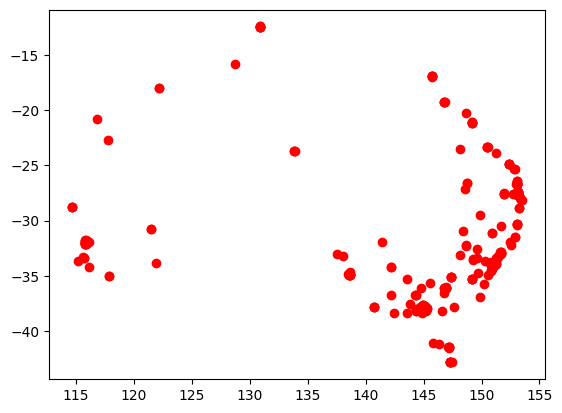

In [21]:
plt.scatter(X[:, 0], X[:, 1], marker='o', color = 'r')

# Attempt to identify a right value for k

### Elbow Method
* Iterate over a range of k values and run k-means clustering for each k.
* For each k, calculate the sum of squared distances (SSE) between data points and their cluster centroids.
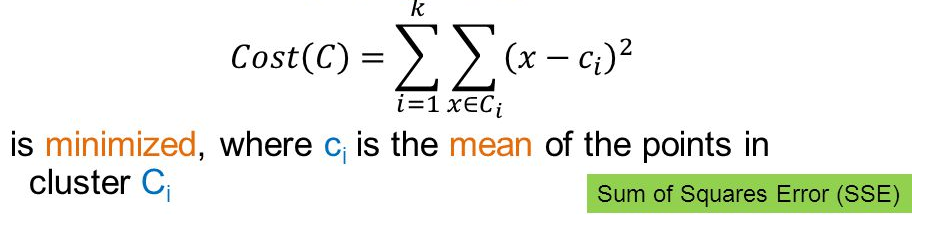
* Plot the SSE values against the corresponding k values.
* Look for the "elbow" point in the plot, where the SSE starts to level off.
* The k value at the elbow point can be a good choice for the number of clusters.

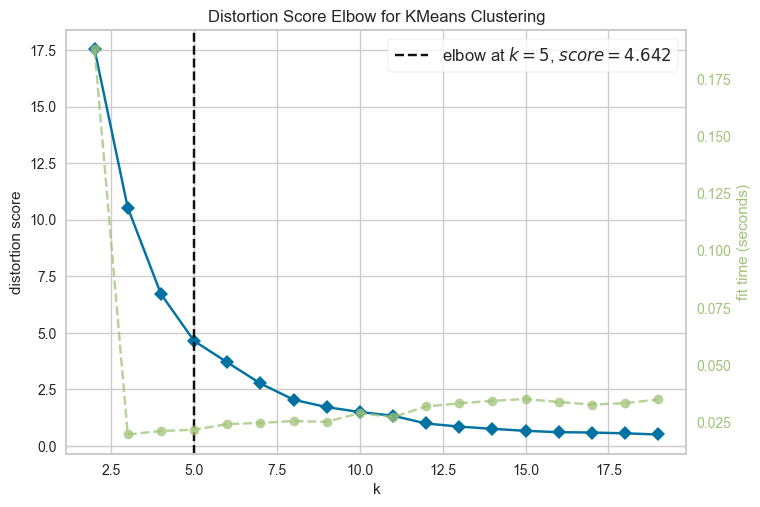

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=42, init = "k-means++")
visualizer = KElbowVisualizer(km, k=(2,20))
 
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()   

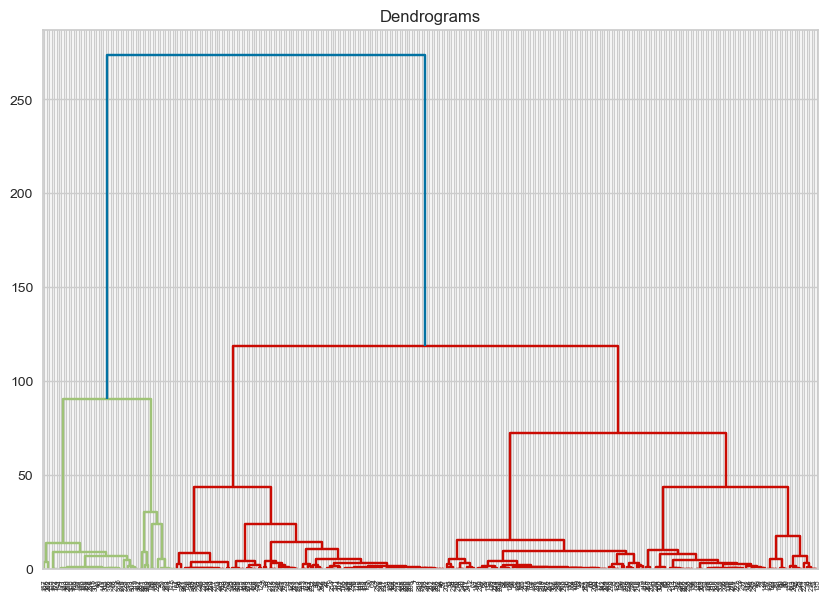

In [55]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

# Final Conclusion: 5 is the most optimal number of cluster

In [25]:
# Final k value, final number of clusters
k_zones = 5

In [26]:
# Define the model
k_means = KMeans(
    init = "k-means++", 
    n_clusters = k_zones, 
    n_init = 12
    )

# Train model
k_means.fit(X_scaled)

KMeans(n_clusters=5, n_init=12)

In [27]:
pred = k_means.predict(X_scaled)

## Clusters

In [28]:
k_means_labels = k_means.labels_
k_means_labels[0:10]

array([2, 2, 4, 0, 2, 3, 1, 2, 2, 2])

## Centroids' Cordinates

In [29]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[0.94341304, 0.58419493, 0.01858928],
       [0.04380271, 0.36190265, 0.01157093],
       [0.75303908, 0.17698072, 0.0317683 ],
       [0.3727483 , 0.86694309, 0.0091302 ],
       [0.92806888, 0.30761874, 0.01166669]])

# Plot the Clustered Data

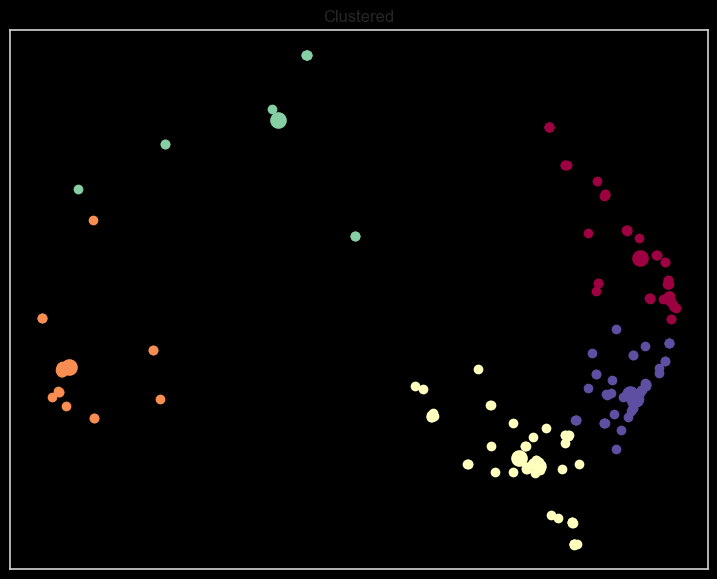

In [36]:
%matplotlib inline
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(9, 7))

# Colors uses a color map, which will produce an array of colors based on the number of labels there are. 
# We use set(k_means_labels) to get the unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-k_zones, which will match the possible clusters that each data point is in.
for k, col in zip(range(k_zones), colors):
    
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, 
    # else they are labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    ax.plot(X_scaled[my_members, 0], X_scaled[my_members, 1], '.', markerfacecolor=col, marker='o', markersize = 7)
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', 
            markersize=12)
    # Draw circle around the clusters
    radius = np.max(np.linalg.norm(X_scaled[my_members] - cluster_center, axis=1))
#     circle = plt.Circle(cluster_center, radius, color=col, fill=False)
#     ax.add_patch(circle)

    
#     # Calculate the displacement for the centroid labels
#     dx = np.sign(cluster_center[0] - np.mean(X[:, 0])) * radius * 6
#     dy = np.sign(cluster_center[1] - np.mean(X[:, 1])) * radius * 2

#     # Add centroid labels outside the circle
#     ax.annotate(f'Cluster {k+1}', (cluster_center[0], cluster_center[1]), xytext=(dx, dy),
#                 textcoords='offset points', ha='center', fontsize=10)
    

# Title of the plot
ax.set_title('Clustered')

# Remove x-axis ticks
ax.set_xticks(())
# Remove y-axis ticks
ax.set_yticks(())

ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0., 0., 0.))
fig.patch.set_facecolor('xkcd:black')

# Show the plot
plt.show()


### Create the answer sheet dataframe

In [37]:
task1_answer = pd.DataFrame(columns = ['CustomerName', "Cluster"])
task1_answer

,CustomerName,Cluster


# Add in the result

In [38]:
task1_answer['CustomerName'] = df['CustomerName']
task1_answer['Cluster'] = k_means_labels + 1

task1_answer.head()

,CustomerName,Cluster
0,Customer 48,3
1,Customer 50,3
2,Customer 51,5
3,Customer 52,1
4,Customer 53,3


In [39]:
task1_answer

,CustomerName,Cluster
0,Customer 48,3
1,Customer 50,3
2,Customer 51,5
3,Customer 52,1
4,Customer 53,3
...,...,...
309,Customer 639,1
310,Customer 640,1
311,Customer 650,3
312,Customer 855,5


# Save the result dataframe to csv file

In [20]:
task1_answer.to_csv('D:\Task1.csv', index = False)